In [18]:
import numpy
# import sys
# sys.path.append("/home/wian/Documents/BEng_Hons/Skogestad-Python/")
# import utils
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Singular Values Across Frequency

In [75]:
Kc = 1
def G(s):
    G11 = 4.29  / ((6.7 * s + 1))
    G12 = -2.38  / ((8.64 * s + 1))
    G13 = -2.156  / ((9.06 * s + 1))
    G21 = 7.215  / ((3.25 * s + 1))
    G22 = -9.218  / ((5.0 * s + 1))
    G23 = -2.156  / ((9.06 * s + 1))
    G31 = -0.5635  / ((8.15 * s + 1))
    G32 =  0.451143 / ((10.9 * s + 1))
    G33 = 1.1 * (10.1*s + 0.87) / ((3.89 * s + 1)*(18.8*s + 1))
    return numpy.diag([Kc, Kc, Kc])*numpy.matrix([[G11, G12, G13],
                         [G21, G22, G23],
                         [G31, G32, G33]])

In [76]:
omega = numpy.logspace(-3,2,1000)

In [77]:
s = omega*1j

In [78]:
freq_responses = [G(si) for si in s]

In [79]:
def Nyquist(Gfr):
    return numpy.max(numpy.linalg.eigvals(Gfr))

In [80]:
nyquists = [Nyquist(G_fr) for G_fr in freq_responses]

In [81]:
nyquists = numpy.array(nyquists)

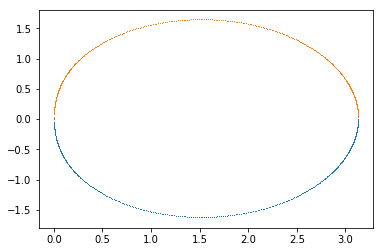

In [82]:
plt.plot(numpy.real(nyquists), numpy.imag(nyquists),',')
plt.plot(numpy.real(nyquists), numpy.imag(numpy.conj(nyquists)),',')
# plt.xlim([-5,5])
# plt.ylim([-5,5])

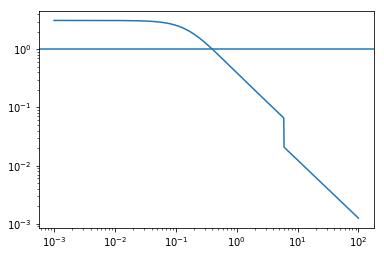

In [83]:
plt.loglog(omega, numpy.abs(nyquists))
plt.axhline(1)